## Exploratory Data Analysis- Project

## Introduction
In this project we are working with data from Instacart grocery delivery platform.
The goal is to clean up the data and prepare a report that gives insight into the shopping habits of Instacart customers.

## Data Overview

Reading and obtaining first 5 rows of all datasets: 

In [1]:
# importing pandas
import pandas as pd 

#importing matplot
import matplotlib.pyplot as plt

In [2]:
#reading and formatting the files 
instacart_orders_df= pd.read_csv('/datasets/instacart_orders.csv', sep=';')
#obtaining first 5 rows
instacart_orders_df.head()


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


In [3]:
products_df= pd.read_csv('/datasets/products.csv', sep=';')

products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [4]:
order_products_df=pd.read_csv('/datasets/order_products.csv', sep=';')

order_products_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [5]:
aisles_df=pd.read_csv('/datasets/aisles.csv', sep=';')

aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [6]:
departments_df=pd.read_csv('/datasets/departments.csv', sep=';')

departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


Obtaining the general information the table of each df:

In [7]:
instacart_orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


This table contains 6 columns. The majority contain the datatype: (int64) except for `'days_since_prior_order'` which contains the data type (float64)

According to the documentation:
* `'order_id'` ID number that uniquely identifies each order
* `'user_id'`: ID number that uniquely identifies each customer account
* `'order_number'`: the number of times this customer has placed an order
* `'order_dow'`: day of the week that the order placed (which day is 0 is uncertain)
* `'order_hour_of_day'`: hour of the day that the order was placed
* `'days_since_prior_order'`: number of days since this customer placed their previous order

In [8]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


This table contains 4 columns. Most with the datatype: (int64) except for `'product_name'` which contains datatype: (object)

According to documentation:

* `'product_id'`: ID number that uniquely identifies each product
* `'product_name'`: name of the product
* `'aisle_id'`: ID number that uniquely identifies each grocery aisle category
* `'department_id'`: ID number that uniquely identifies each grocery department category


In [9]:
order_products_df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


This table contains 4 columns. Most with datatype: (int64) except for `'add_to_cart_order'` which contains datatype: (float64)

According to documentation: 

* `'order_id'`:ID number that uniquely identifies each order 
* `'product_id'`:ID number that uniquely identifies each product
* `'add_to_cart_order'`: the sequential order in which each item was placed in the cart
* `'reordered'`: 0 if the customer has never ordered this product before, 1 if they have


In [10]:
aisles_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


This table contains 2 columns. `'aisle_id'` datatype: (int64) and `'aisle'` datatype: (object)

According to documentation: 

* `'aisle_id'`: ID number that uniquely identifies each grocery aisle category
* `'aisle'`: name of the aisle 

In [11]:
departments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


This table contains 2 columns. `'department_id'` datatype: (int64) and `'department'` datatype: (object)

According to documentation: 

* `'department_id'`:ID number that uniquely identifies each grocery department category
* `'department'`: name of the department

## Handeling Duplicates

### `orders` data frame

In [12]:
# Check for duplicated orders
instacart_orders_df.duplicated().sum()

15

There are 15 duplicated rows in the `'instacart_orders_df'` data frame. 

In [13]:
# Check for all orders placed Wednesday at 2:00 AM
wed_orders= instacart_orders_df.query('order_dow == 3 and order_hour_of_day == 2', )['order_hour_of_day']
wed_orders

4838      2
5156      2
15506     2
18420     2
24691     2
         ..
457013    2
458816    2
459635    2
468324    2
477526    2
Name: order_hour_of_day, Length: 121, dtype: int64

There are 121 orders placed on Wednesday at 2:00AM.

In [14]:
# Remove duplicate orders
instacart_orders_df=instacart_orders_df.drop_duplicates().reset_index(drop=True)
instacart_orders_df

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0
...,...,...,...,...,...,...
478947,3210681,5617,5,1,14,7.0
478948,3270802,112087,2,3,13,6.0
478949,885349,82944,16,2,11,6.0
478950,216274,4391,3,3,8,8.0


In [15]:
# Double check for duplicate rows
instacart_orders_df.duplicated().sum()

0

In [16]:
# Double check for duplicate order IDs only
instacart_orders_df['order_id'].duplicated().sum()

0

Duplicates have been removed from the `'instacart_orders_df'`

### `products` data frame

In [17]:
# Check for fully duplicate rows
products_df.duplicated().sum()

0

In [18]:
# Check for just duplicate product IDs
products_df['product_id'].duplicated().sum()

0

In [19]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products_df[products_df['product_name'].str.lower().duplicated(keep=False)]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
41,42,Biotin 1000 mcg,47,11
71,72,NaN,100,21
109,110,NaN,100,21
185,186,Fresh Scent Dishwasher Detergent with Dawn,74,17
...,...,...,...,...
49689,49690,HIGH PERFORMANCE ENERGY DRINK,64,7
49690,49691,ORIGINAL PANCAKE & WAFFLE MIX,130,14
49691,49692,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR,130,14
49692,49693,SPRING WATER BODY WASH,127,11


In [20]:
##### Check for duplicate product names that aren't missing
products_df['product_name'].str.lower().dropna().duplicated(keep=False).sum()


207

There are 1465 duplicates in the `'products_df'` column `'product_name'` when we include missing values. 
There are 207 duplicates when missing values are dropped. 

### `departments` data frame

In [21]:
# Check for duplicates
departments_df.duplicated().sum()

0

There are no duplicates in the `'departments_df'`

In [22]:
departments_df['department_id'].duplicated().sum()

0

There are no duplicates in the `'department_id'` column 

### `aisles` data frame

In [23]:
# Check for duplicates
aisles_df.duplicated().sum()

0

In [24]:
aisles_df['aisle_id'].duplicated().sum()

0

There are no duplicates in the `'aisles_df'`

### `order_products` data frame

In [25]:
# Check for fullly duplicate rows
order_products_df.duplicated().sum()

0

In [26]:
# Double check for any other tricky duplicates
duplicates=order_products_df.duplicated(subset=['order_id', 'product_id'], keep=False)
order_products_df[duplicates].sort_values(by=['order_id', 'product_id'])

,order_id,product_id,add_to_cart_order,reordered


There are no duplicates in the `'order_products_df'`

## Handeling Missing Values


### `products` data frame

In [27]:
#find how many missing values are in each column
products_df.isna().sum()

product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [28]:
# Are all of the missing product names associated with aisle ID 100?
missing_products_df=products_df[(products_df['product_name'].isna()) & (products_df['aisle_id'] ==100)]
missing_products_df

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


The number of missing values in `'product_name'` with `'isle_id'` equal to 100 is the same as the number of missing values in the `'product_name'` column.

In [29]:
# Are all of the missing product names associated with department ID 21?
missing_products_df= missing_products_df[(missing_products_df['aisle_id'] == 100) & (missing_products_df['department_id'] == 21)]
missing_products_df

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


The number of missing values in `'missing_products_df'` is the same when filtered for `'department_id'` equal to 21

In [30]:

# What is this aisle and department?

missig_aisle=aisles_df.loc[99]
missig_aisle

aisle_id        100
aisle       missing
Name: 99, dtype: object

In [31]:
missig_department=departments_df.loc[20]
missig_department

department_id         21
department       missing
Name: 20, dtype: object

Both aisle and department that contain missing values is named "missing"

In [32]:
# Fill missing product names with 'Unknown'
products_df['product_name'] = products_df['product_name'].fillna('Unknown')
products_df['product_name'].sample(10)

15556          Medium Chipotle Garlic Taco Skillet Sauce
20563           Organic Chewy Peanut Butter Banana Bites
34719                               Avocado Oil- Refined
13159                             Medium Round Container
13930                              Sweetened Raspberries
44149                                 Non Alcoholic Beer
42404                                    Cocktail Onions
34444                     Organic Whole Grain Red Quinoa
1848                   Ultra Fine Mist Aerosol Hairspray
30336    Gluten Free Dark Chocolate Cocoa Breakfast Bars
Name: product_name, dtype: object

### `orders` data frame

In [33]:
#how many missing values in orders df 
instacart_orders_df.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [34]:
# Are there any missing values where it's not a customer's first order?
missing_orders_df=instacart_orders_df[(instacart_orders_df['order_number'] != 1)].isna().sum()
missing_orders_df

order_id                  0
user_id                   0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

### `order_products` data frame

In [35]:
#how many missing values
order_products_df.isna().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [36]:
# What are the min and max values in this column?
min_value = order_products_df['add_to_cart_order'].min()
max_value = order_products_df['add_to_cart_order'].max()
min_value, max_value

(1.0, 64.0)

In [37]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
order_ids_with_missing_values= order_products_df[(order_products_df['add_to_cart_order'].isna())]
order_ids_with_missing_values

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [38]:
# Do all orders with missing values have more than 64 products?
order_ids_with_missing_values= order_products_df[order_products_df['add_to_cart_order'].isna()]['order_id'].unique()
filtered_orders =  order_products_df[ order_products_df['order_id'].isin(order_ids_with_missing_values)]
order_counts = filtered_orders.groupby('order_id').size()
all_orders_above_64 = (order_counts > 64).all()

all_orders_above_64

True

All orders with missing values have more that 64 products

In [39]:
# Replace missing values with 999 and convert column to integer type

order_products_df = order_products_df.assign(add_to_cart_order=order_products_df['add_to_cart_order'].fillna(999).astype(int))
order_products_df

,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17,0
1,567889,1560,1,1
2,2261212,26683,1,1
3,491251,8670,35,1
4,2571142,1940,5,1
...,...,...,...,...
4545002,577211,15290,12,1
4545003,1219554,21914,9,0
4545004,692640,47766,4,1
4545005,319435,691,8,1


 ## Conclusion
 
 Through our data processing we concluded the following: 
 - There are 15 duplicated rows in the `'instacart_orders_df'` data frame.
 - There are 121 orders placed on Wednesday at 2:00AM.
 - There are 1465 duplicates in the `'products_df'` column `'product_name'` when we include missing values. There are 207 duplicates when missing values are dropped.
 - There are no duplicates in the `'departments_df'`
 - There are no duplicates in the `'aisles_df'`
 - There are no duplicates in the `'order_products_df'`
 - The number of missing values in `'product_name'` with `'isle_id'` equal to 100 is the same as the number of missing values in the `'product_name'` column.
 - The number of missing values in `'missing_products_df'` is the same when filtered for `'department_id'` equal to 21
 - Both aisle and department that contain missing values is named "missing"
 - All orders with missing values have more that 64 products

### Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [40]:
# Check the unique values in 'order_hour_of_day'
order_hour_unique = instacart_orders_df['order_hour_of_day'].unique()

# Check the unique values in 'order_dow'
order_dow_unique = instacart_orders_df['order_dow'].unique()

# Verify the ranges
order_hour_valid = (order_hour_unique >= 0).all() and (order_hour_unique <= 23).all()
order_dow_valid = (order_dow_unique >= 0).all() and (order_dow_unique <= 6).all()

order_hour_valid, order_dow_valid

(True, True)

- For `'order_hour_of_day'` we verified that values range from 0 to 23, confirming that data is correctly representing hours of the day.
- For `'order_dow'` we verified that values range from 0 to 6, correctly representing the days of the week.

###  What time of day do people shop for groceries?

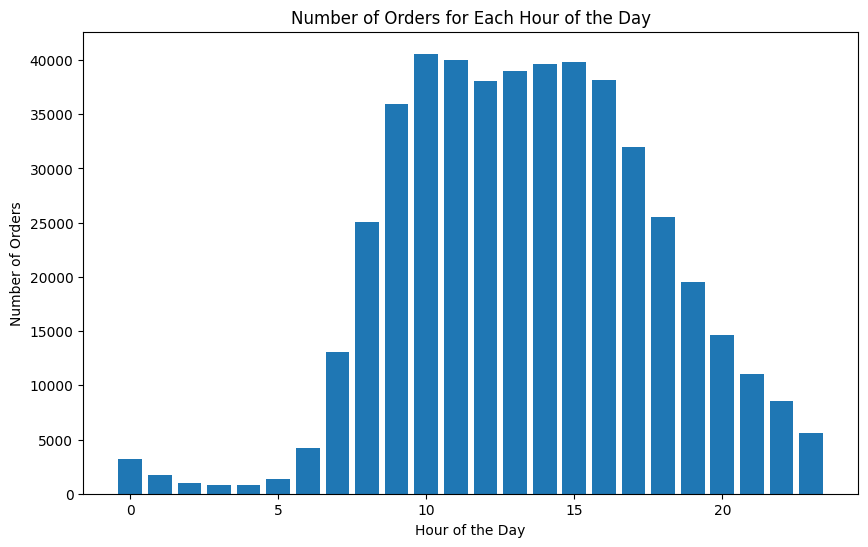

In [41]:
orders_by_hour = instacart_orders_df['order_hour_of_day'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(orders_by_hour.index, orders_by_hour.values)
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for Each Hour of the Day')
plt.show()

People are mostly shopping for groceries between 10am and 3pm

###  What day of the week do people shop for groceries?

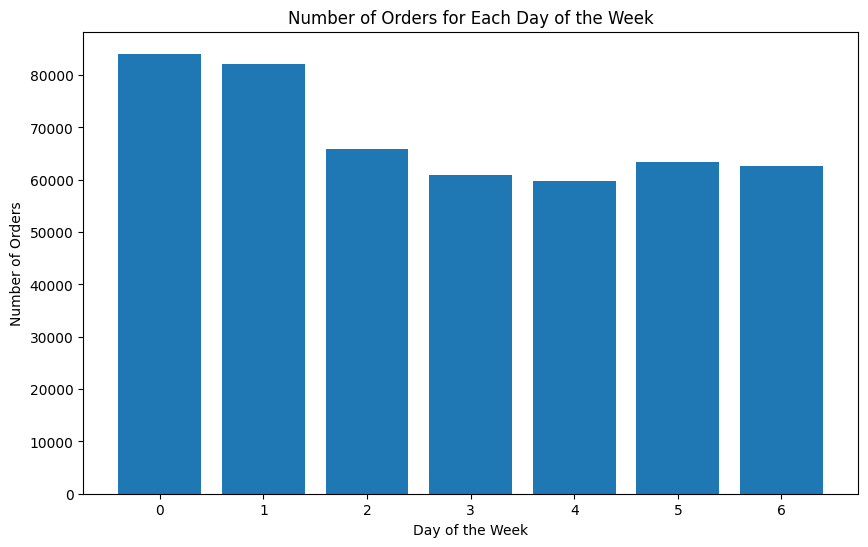

In [42]:
orders_by_dow = instacart_orders_df['order_dow'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
plt.bar(orders_by_dow.index, orders_by_dow.values)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for Each Day of the Week')
plt.show()

Orders are mostly placed on Sunday and Monday

### How long do people wait until placing another order?

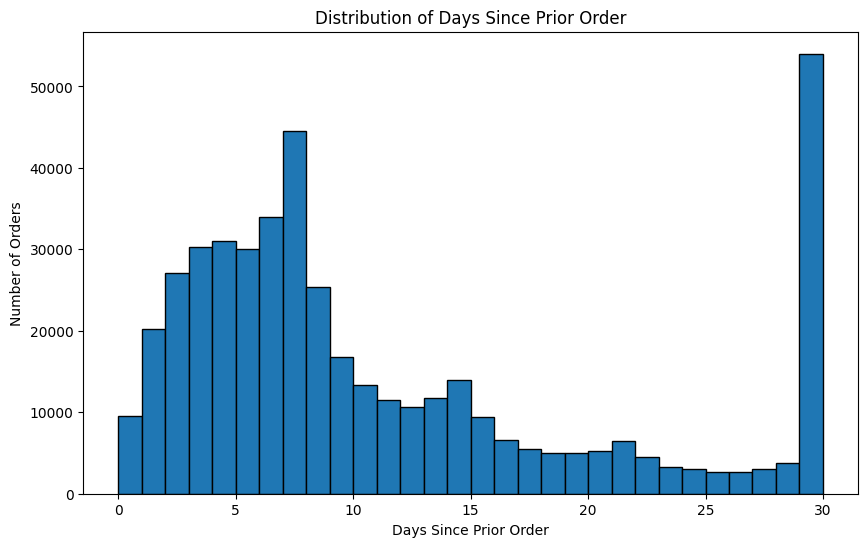

In [43]:
plt.figure(figsize=(10, 6))
plt.hist(instacart_orders_df['days_since_prior_order'], bins=30, edgecolor='black')
plt.xlabel('Days Since Prior Order')
plt.ylabel('Number of Orders')
plt.title('Distribution of Days Since Prior Order')
plt.show()

People typically wait 7-8 days or a month between orders placed

###  Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays?


In [44]:
#filter orders by day 
wednesday_orders = instacart_orders_df[instacart_orders_df['order_dow'] == 3]['order_hour_of_day']
saturday_orders = instacart_orders_df[instacart_orders_df['order_dow'] == 6]['order_hour_of_day']

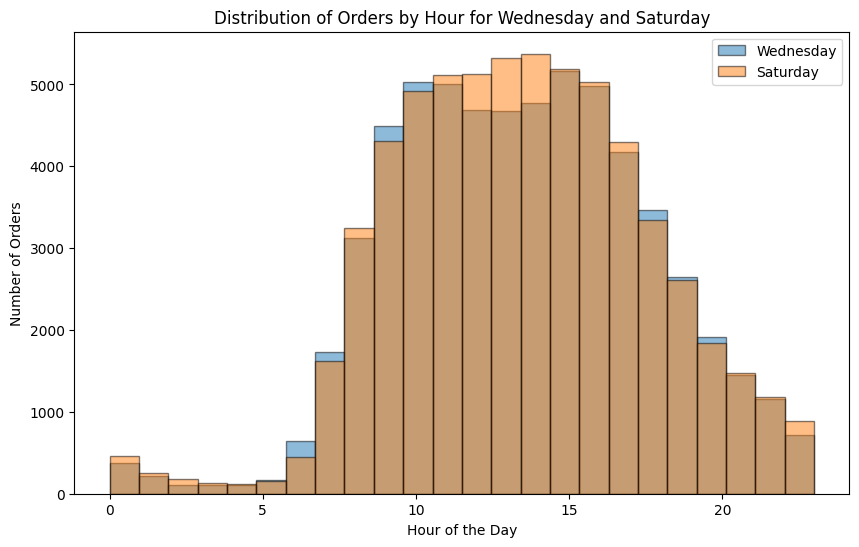

In [45]:
plt.figure(figsize=(10, 6))
plt.hist(wednesday_orders, bins=24, alpha=0.5, label='Wednesday', edgecolor='black')
plt.hist(saturday_orders, bins=24, alpha=0.5, label='Saturday', edgecolor='black')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Distribution of Orders by Hour for Wednesday and Saturday')
plt.legend()
plt.show()

There are usually more orders placed on Saturday than Wednesday between the times of 11am to 5 pm.

### What's the distribution for the number of orders per customer?

In [46]:
orders_per_customer = instacart_orders_df.groupby('user_id')['order_id'].count()

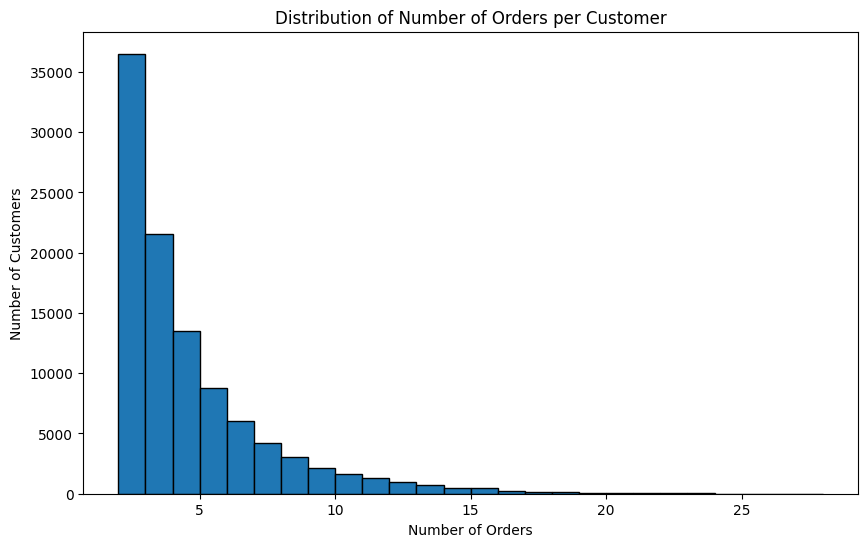

In [47]:
plt.figure(figsize=(10, 6))
plt.hist(orders_per_customer, bins=range(2, orders_per_customer.max()+1), edgecolor='black')
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Distribution of Number of Orders per Customer')
plt.show()

The distribution shows that most customers have placed a relatively small number of orders, with a decreasing number of customers as the number of orders increases. 

### What are the top 20 popular products?

In [48]:
top_20_products = order_products_df['product_id'].value_counts().head(20)
top_20_products = pd.DataFrame({'product_id': top_20_products.index, 'frequency': top_20_products.values})
top_20_products = top_20_products.merge(products_df[['product_id', 'product_name']], on='product_id')
print(top_20_products)

    product_id  frequency              product_name
0        24852      66050                    Banana
1        13176      53297    Bag of Organic Bananas
2        21137      37039      Organic Strawberries
3        21903      33971      Organic Baby Spinach
4        47209      29773      Organic Hass Avocado
5        47766      24689           Organic Avocado
6        47626      21495               Large Lemon
7        16797      20018              Strawberries
8        26209      19690                     Limes
9        27845      19600        Organic Whole Milk
10       27966      19197       Organic Raspberries
11       22935      15898      Organic Yellow Onion
12       24964      15292            Organic Garlic
13       45007      14584          Organic Zucchini
14       39275      13879       Organic Blueberries
15       49683      13675            Cucumber Kirby
16       28204      12544        Organic Fuji Apple
17        5876      12232             Organic Lemon
18        82

The most frequently ordered products are primarily fresh produce like bananas, organic bananas, organic strawberries, and organic baby spinach. This suggests a preference for fresh and organic items among Instacart users.

### How many items do people typically buy in one order? What does the distribution look like?

In [49]:
items_per_order = order_products_df['order_id'].value_counts()
items_per_order.mean()

10.098983215049127

On average people buy 10 items per order

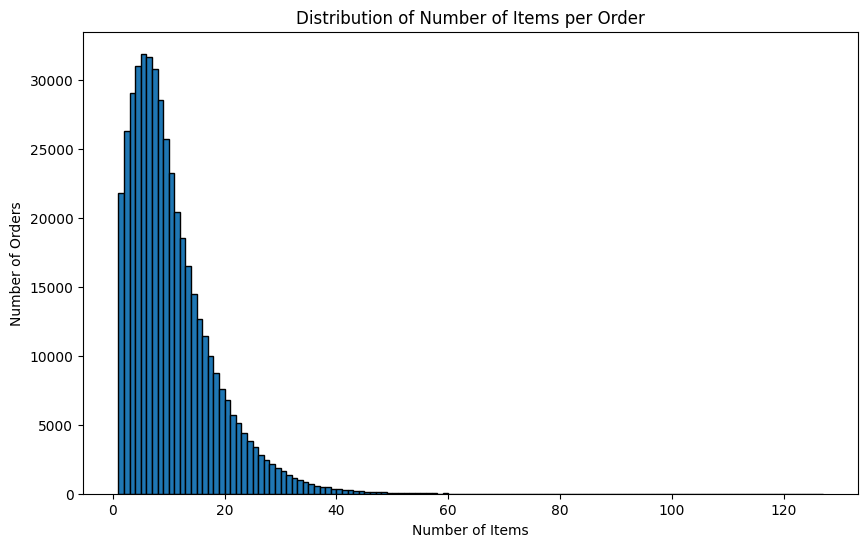

In [50]:
plt.figure(figsize=(10, 6))
plt.hist(items_per_order, bins=range(1, items_per_order.max()+1), edgecolor='black')
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.title('Distribution of Number of Items per Order')
plt.show()

On average, people buy around 10 items per order. The histogram shows a wide range of order sizes, indicating diverse shopping habits.

###  What are the top 20 items that are reordered most frequently?

In [51]:
top_20_reordered = order_products_df[order_products_df['reordered'] == 1]['product_id'].value_counts().head(20)
top_20_reordered = pd.DataFrame({'product_id': top_20_reordered.index, 'frequency': top_20_reordered.values})
top_20_reordered = top_20_reordered.merge(products_df[['product_id', 'product_name']], on='product_id')
print(top_20_reordered)

    product_id  frequency              product_name
0        24852      55763                    Banana
1        13176      44450    Bag of Organic Bananas
2        21137      28639      Organic Strawberries
3        21903      26233      Organic Baby Spinach
4        47209      23629      Organic Hass Avocado
5        47766      18743           Organic Avocado
6        27845      16251        Organic Whole Milk
7        47626      15044               Large Lemon
8        27966      14748       Organic Raspberries
9        16797      13945              Strawberries
10       26209      13327                     Limes
11       22935      11145      Organic Yellow Onion
12       24964      10411            Organic Garlic
13       45007      10076          Organic Zucchini
14       49683       9538            Cucumber Kirby
15       28204       8989        Organic Fuji Apple
16        8277       8836  Apple Honeycrisp Organic
17       39275       8799       Organic Blueberries
18        58

The top 20 reordered items include bananas, organic bananas, and organic strawberries, highlighting consistent preferences for certain products.

### For each product, what proportion of its orders are reorders?

In [52]:
product_reorders = order_products_df.groupby('product_id')['reordered'].mean().reset_index()
product_reorders = product_reorders.merge(products_df[['product_id', 'product_name']], on='product_id')
product_reorders = product_reorders.rename(columns={'reordered': 'reorder_proportion'})
print(product_reorders.head())

   product_id  reorder_proportion  \
0           1            0.564286   
1           2            0.000000   
2           3            0.738095   
3           4            0.510204   
4           7            0.500000   

                                        product_name  
0                         Chocolate Sandwich Cookies  
1                                   All-Seasons Salt  
2               Robust Golden Unsweetened Oolong Tea  
3  Smart Ones Classic Favorites Mini Rigatoni Wit...  
4                     Pure Coconut Water With Orange  


### For each customer, what proportion of their products ordered are reorders?

In [53]:
customer_reorders = order_products_df.groupby('order_id')['reordered'].mean().reset_index()
customer_reorders = customer_reorders.merge(instacart_orders_df[['order_id', 'user_id']], on='order_id')
customer_reorders = customer_reorders.groupby('user_id')['reordered'].mean().reset_index()
customer_reorders = customer_reorders.rename(columns={'reordered': 'reorder_proportion'})
print(customer_reorders.head())

   user_id  reorder_proportion
0        2            0.038462
1        4            0.000000
2        5            0.666667
3        6            0.000000
4        7            0.944444


For each product and each customer, we calculated the proportion of orders that are reorders, revealing customer loyalty and product popularity.

###  What are the top 20 items that people put in their carts first? 

In [54]:
first_items = order_products_df[order_products_df['add_to_cart_order'] == 1]['product_id'].value_counts().head(20)
first_items = pd.DataFrame({'product_id': first_items.index, 'count': first_items.values})
first_items = first_items.merge(products_df[['product_id', 'product_name']], on='product_id')
print(first_items)

    product_id  count                 product_name
0        24852  15562                       Banana
1        13176  11026       Bag of Organic Bananas
2        27845   4363           Organic Whole Milk
3        21137   3946         Organic Strawberries
4        47209   3390         Organic Hass Avocado
5        21903   3336         Organic Baby Spinach
6        47766   3044              Organic Avocado
7        19660   2336                 Spring Water
8        16797   2308                 Strawberries
9        27966   2024          Organic Raspberries
10       44632   1914   Sparkling Water Grapefruit
11       49235   1797          Organic Half & Half
12       47626   1737                  Large Lemon
13         196   1733                         Soda
14       38689   1397     Organic Reduced Fat Milk
15       26209   1370                        Limes
16       12341   1340                Hass Avocados
17        5785   1310  Organic Reduced Fat 2% Milk
18       27086   1309          

The analysis of the first items placed in the cart shows a strong preference for bananas, bag of organic bananas, and organic whole milk. This indicates that customers likely prioritize these essential items when starting their shopping.

## Conculsion

Through this comprehensive analysis, we gained valuable insights into customer shopping behaviors on Instacart. The data reveals preferences for shopping times, popular products, and typical order sizes. These findings can help Instacart and similar platforms tailor their services to meet customer needs, optimize inventory management, and enhance the overall shopping experience.






